## 0. Import Package

In [1]:
# Imports used in this notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import os
import glob

from sktime.classification.hybrid import HIVECOTEV2
from sktime.classification.interval_based import DrCIF
from sktime.classification.kernel_based import RocketClassifier

## 1. Analyze Data

**Function to Show Data**

Plot 2 Sample

In [341]:
# Function for making a plot
def draw_graph(df1_path,df2_path):
    # read the csv file
    df1 = pd.read_csv(df1_path,sep="\t")
    df2 = pd.read_csv(df2_path,sep="\t")

    # print the location and filename
    print('Shape df1', df1.shape)
    print('Shape df2', df2.shape)
    print()

    # select the columns we need and convert to numpy arrays

    fig,ax = plt.subplots(nrows=3,
                        ncols=2,
                        figsize=(20,18))

    ax[0,0].plot(df1["Acc_X"])
    ax[0,0].plot(df2["Acc_X"])
    ax[1,0].plot(df1["Acc_Y"])
    ax[1,0].plot(df2["Acc_Y"])
    ax[2,0].plot(df1["Acc_Z"])
    ax[2,0].plot(df2["Acc_Z"])
    ax[0,1].plot(df1["Gyr_X"])
    ax[0,1].plot(df2["Gyr_X"])
    ax[1,1].plot(df1["Gyr_Y"])
    ax[1,1].plot(df2["Gyr_Y"])
    ax[2,1].plot(df1["Gyr_Z"])
    ax[2,1].plot(df2["Gyr_Z"])

    ax[0,0].set(ylabel="Acc_X",xlabel="Time Series",title="Acc_X")
    ax[1,0].set(ylabel="Acc_Y",xlabel="Time Series",title="Acc_Y")
    ax[2,0].set(ylabel="Acc_Z",xlabel="Time Series",title="Acc_Z")
    ax[0,1].set(ylabel="Gyr_X",xlabel="Time Series",title="Gyr_X")
    ax[1,1].set(ylabel="Gyr_Y",xlabel="Time Series",title="Gyr_Y")
    ax[2,1].set(ylabel="Gyr_Z",xlabel="Time Series",title="Gyr_Z")

    ax[2,0].set(xlabel="Time Series")
    ax[2,1].set(xlabel="Time Series");

Plot 5 Sample

In [344]:
# Function for making a plot
def draw_graph5(df1_path,df2_path,df3_path,df4_path,df5_path):
    # read the csv file
    df1 = pd.read_csv(df1_path,sep="\t")
    df2 = pd.read_csv(df2_path,sep="\t")
    df3 = pd.read_csv(df3_path,sep="\t")
    df4 = pd.read_csv(df4_path,sep="\t")
    df5 = pd.read_csv(df5_path,sep="\t")

    # print the location and filename
    print('Shape df1', df1.shape)
    print('Shape df2', df2.shape)
    print('Shape df3', df3.shape)
    print('Shape df4', df4.shape)
    print('Shape df5', df5.shape)
    print()

    # select the columns we need and convert to numpy arrays

    fig,ax = plt.subplots(nrows=3,
                        ncols=2,
                        figsize=(20,18))

    ax[0,0].plot(df1["Acc_X"])
    ax[0,0].plot(df2["Acc_X"])
    ax[0,0].plot(df3["Acc_X"])
    ax[0,0].plot(df4["Acc_X"])
    ax[0,0].plot(df5["Acc_X"])
    
    ax[1,0].plot(df1["Acc_Y"])
    ax[1,0].plot(df2["Acc_Y"])
    ax[1,0].plot(df3["Acc_Y"])
    ax[1,0].plot(df4["Acc_Y"])
    ax[1,0].plot(df5["Acc_Y"])
    
    ax[2,0].plot(df1["Acc_Z"])
    ax[2,0].plot(df2["Acc_Z"])
    ax[2,0].plot(df3["Acc_Z"])
    ax[2,0].plot(df4["Acc_Z"])
    ax[2,0].plot(df5["Acc_Z"])
    
    ax[0,1].plot(df1["Gyr_X"])
    ax[0,1].plot(df2["Gyr_X"])
    ax[0,1].plot(df3["Gyr_X"])
    ax[0,1].plot(df4["Gyr_X"])
    ax[0,1].plot(df5["Gyr_X"])
    
    ax[1,1].plot(df1["Gyr_Y"])
    ax[1,1].plot(df2["Gyr_Y"])
    ax[1,1].plot(df3["Gyr_Y"])
    ax[1,1].plot(df4["Gyr_Y"])
    ax[1,1].plot(df5["Gyr_Y"])
    
    ax[2,1].plot(df1["Gyr_Z"])
    ax[2,1].plot(df2["Gyr_Z"])
    ax[2,1].plot(df3["Gyr_Z"])
    ax[2,1].plot(df4["Gyr_Z"])
    ax[2,1].plot(df5["Gyr_Z"])

    
    
    ax[0,0].set(ylabel="Acc_X",xlabel="Time Series",title="Acc_X")
    ax[1,0].set(ylabel="Acc_Y",xlabel="Time Series",title="Acc_Y")
    ax[2,0].set(ylabel="Acc_Z",xlabel="Time Series",title="Acc_Z")
    ax[0,1].set(ylabel="Gyr_X",xlabel="Time Series",title="Gyr_X")
    ax[1,1].set(ylabel="Gyr_Y",xlabel="Time Series",title="Gyr_Y")
    ax[2,1].set(ylabel="Gyr_Z",xlabel="Time Series",title="Gyr_Z")

    ax[2,0].set(xlabel="Time Series")
    ax[2,1].set(xlabel="Time Series");

**Different Falling Data**

Shape df1 (293, 24)
Shape df2 (578, 24)



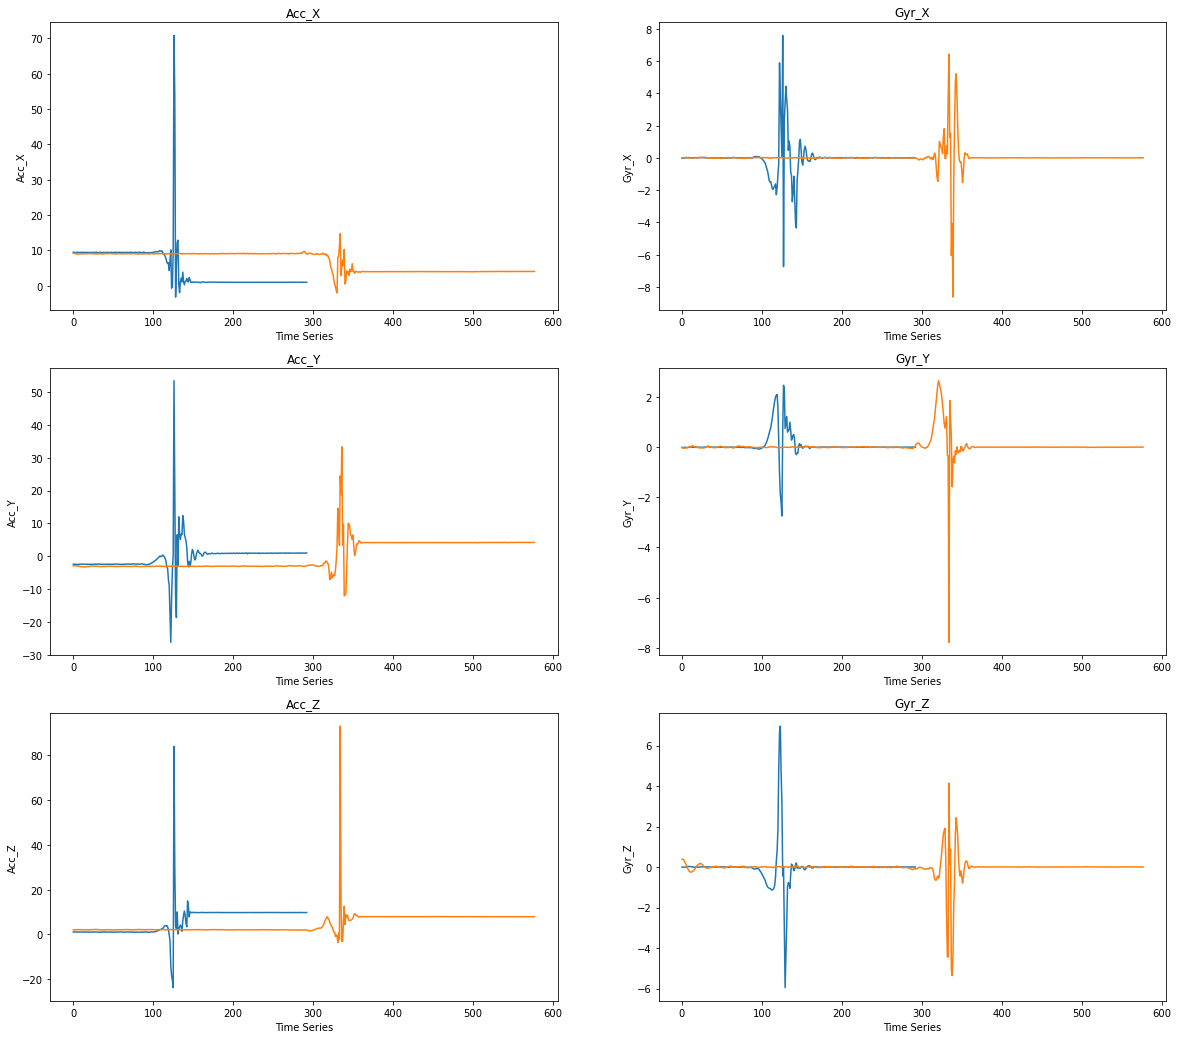

In [247]:
# For data1
draw_graph("data_split/fall/102_901_1.txt","data_split/fall/105_901_5.txt")

Shape df1 (437, 24)
Shape df2 (387, 24)
Shape df3 (383, 23)
Shape df4 (470, 23)
Shape df5 (520, 23)



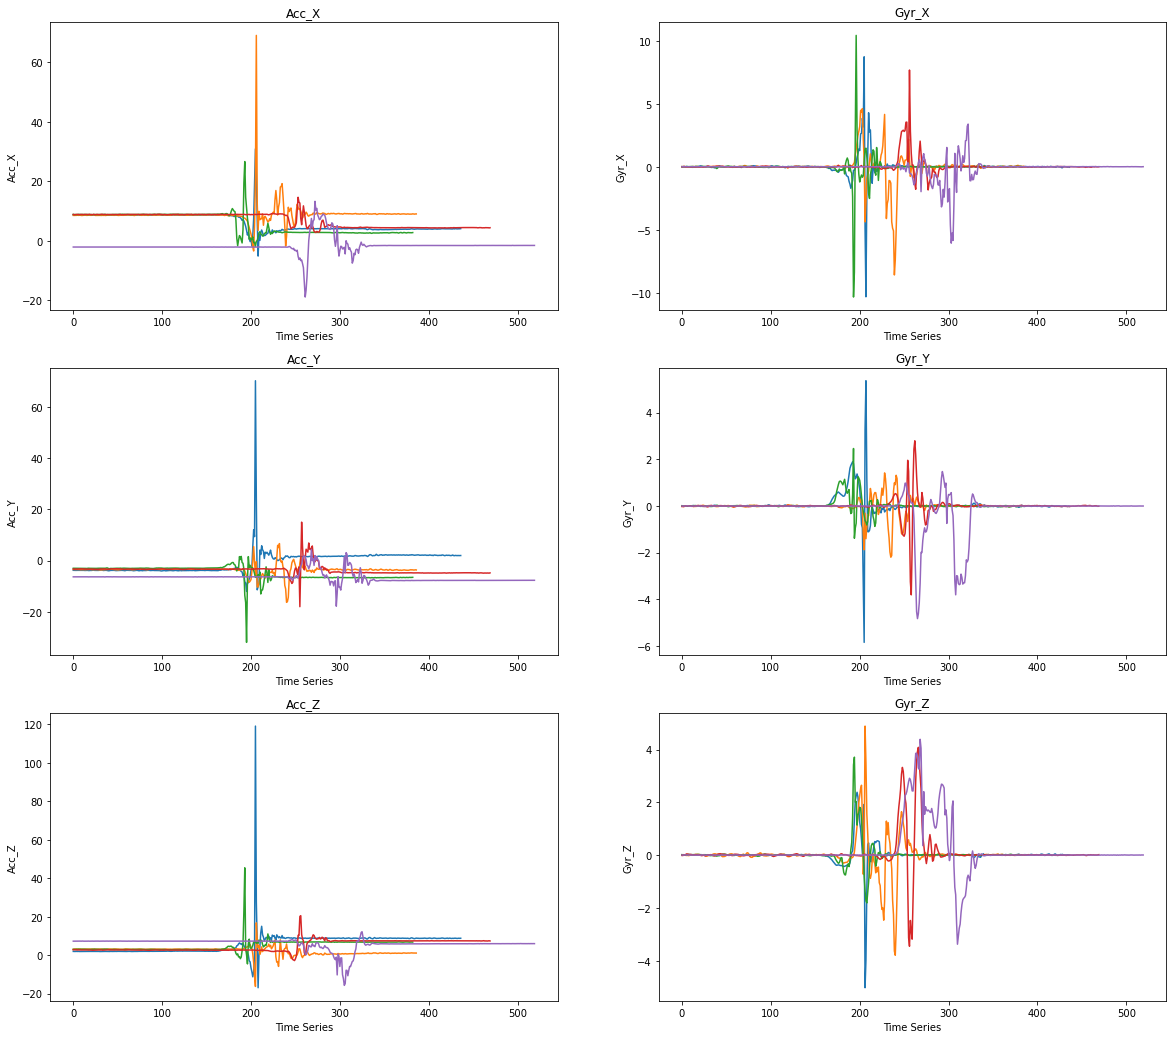

In [345]:
# For data2
draw_graph5("data2_split/fall/101_901_1.txt","data2_split/fall/101_905_1.txt","data2_split/fall/101_909_1.txt","data2_split/fall/101_915_1.txt","data2_split/fall/101_917_1.txt")

**Different Non-Falling Data**

Shape df1 (541, 24)
Shape df2 (416, 24)



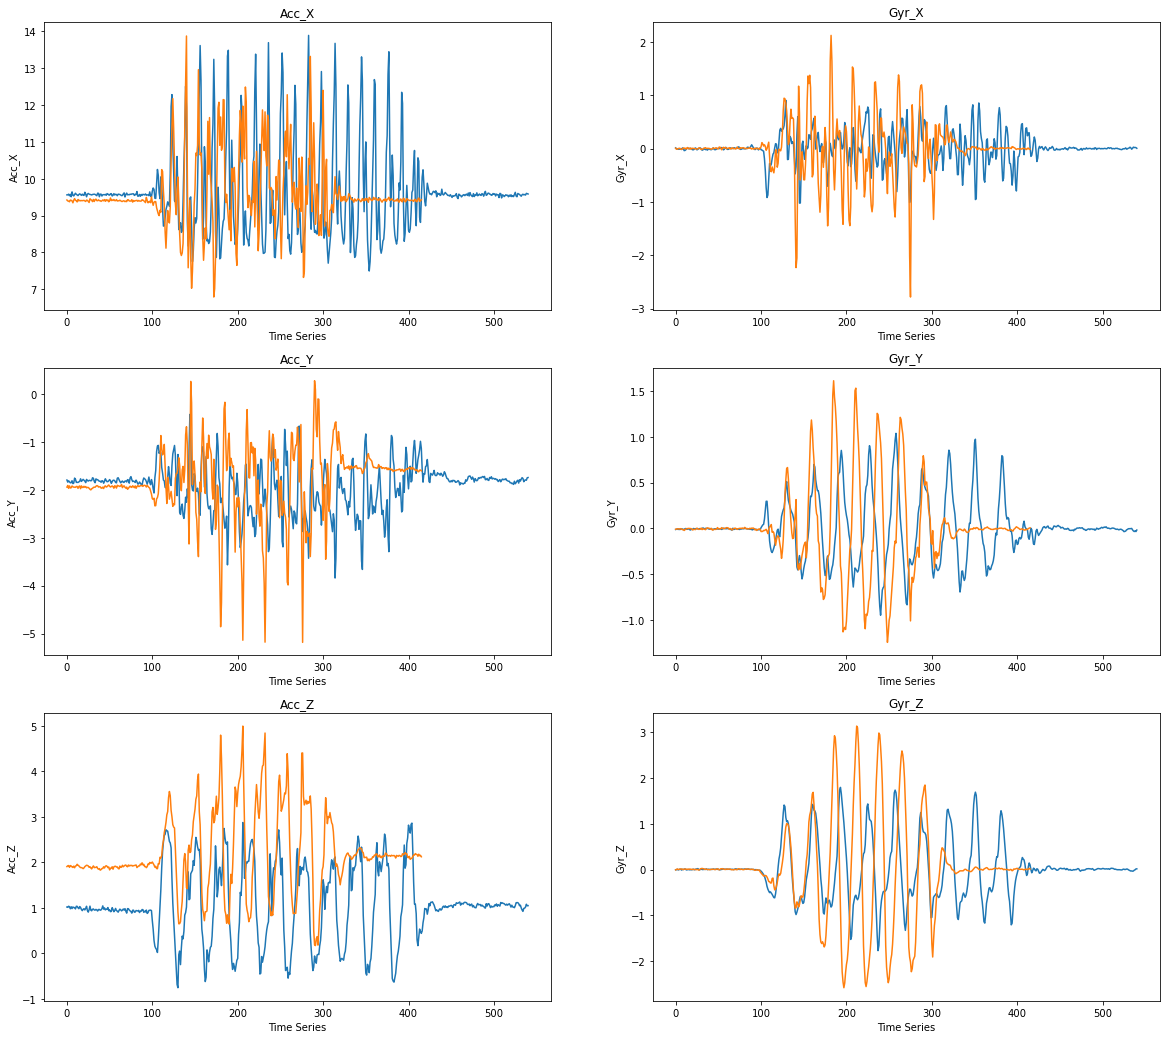

In [248]:
# for data1
draw_graph("data_split/non-fall/102_801_2.txt","data_split/non-fall/103_801_1.txt")

Shape df1 (616, 24)
Shape df2 (516, 24)
Shape df3 (414, 24)
Shape df4 (372, 24)
Shape df5 (469, 24)



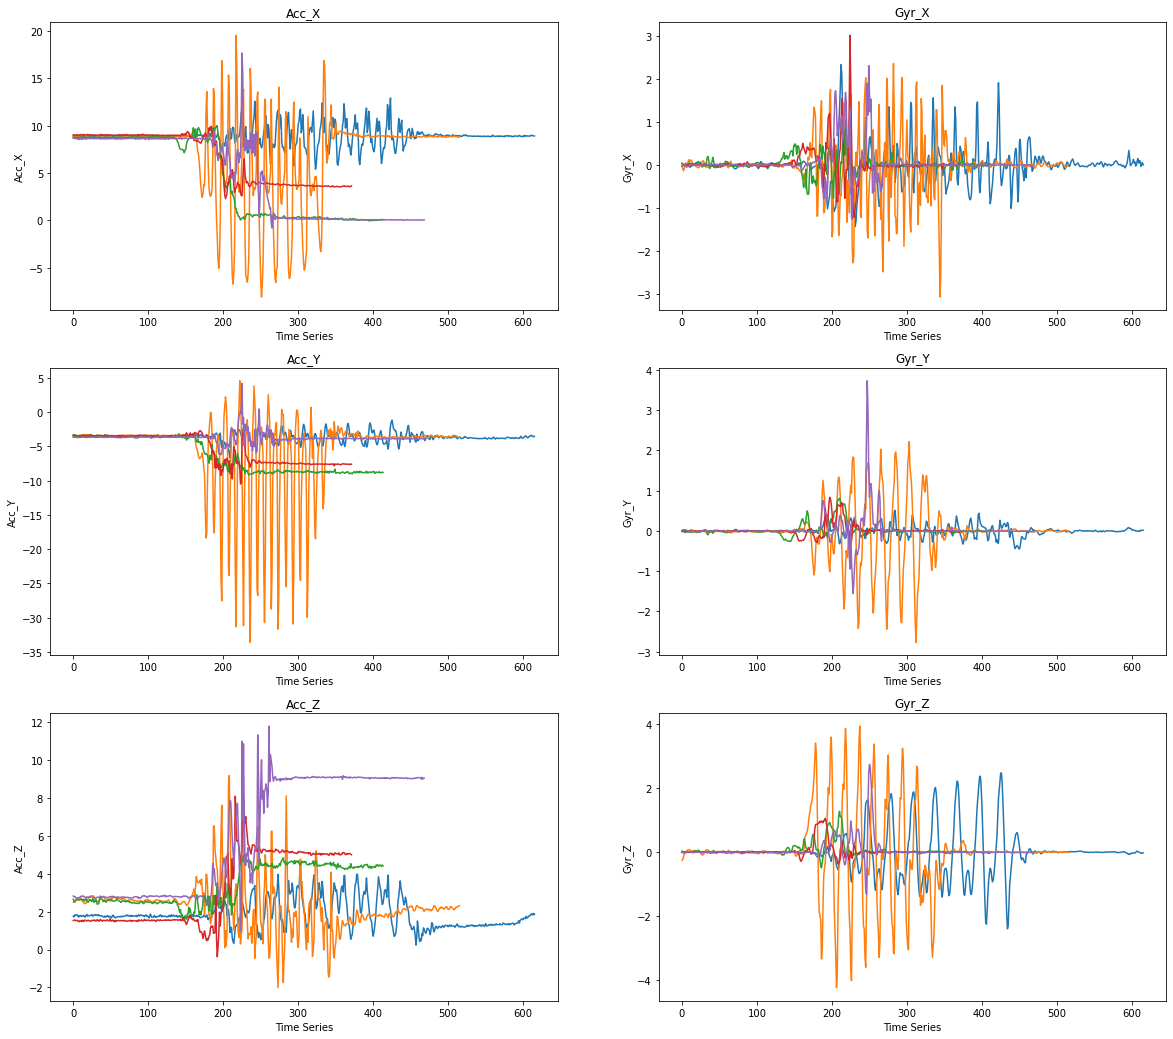

In [346]:
# for data2
draw_graph5("data2_split/non-fall/101_801_1.txt","data2_split/non-fall/101_803_1.txt","data2_split/non-fall/101_806_1.txt","data2_split/non-fall/101_811_1.txt","data2_split/non-fall/101_815_1.txt")

**Falling VS. Non-Falling Data**

Shape df1 (293, 24)
Shape df2 (525, 24)



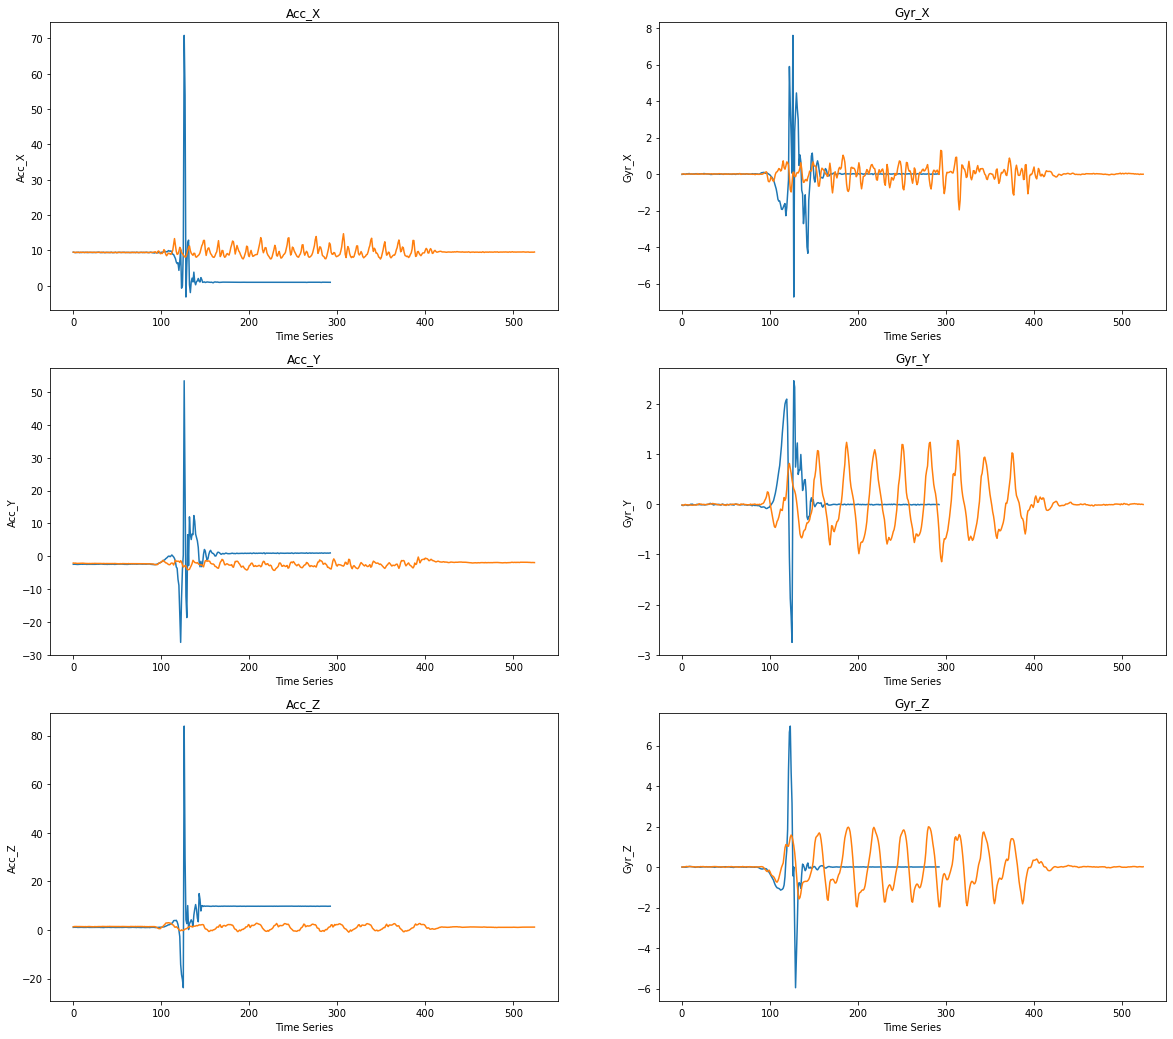

In [249]:
# for data1
draw_graph("data_split/fall/102_901_1.txt","data_split/non-fall/102_801_1.txt")

**Data Length**
* Observation tell us that the key features appear around the midpoint of the time interval

In [198]:
def data_length_analysic(folder_path):
    # use glob to get all the csv files in the folder
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(folder_path, "*.txt"))

    f_len = []

    # loop over the list of csv files
    for f in csv_files:

        # read the csv file
        df = pd.read_csv(f,sep="\t")

        # print the location and filename
        print('Location:', f)
        print('File Name:', f.split("\\")[-1])
        print('Shape', df.shape)
        f_len.append(df.shape[0])

        print()
    
    return f_len

### Data1

* Falling data

In [199]:
# data1 Falling data
fall_f_len = data_length_analysic("data_split/fall/")

Location: data_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data_split/fall\101_901_2.txt
File Name: 101_901_2.txt
Shape (453, 24)

Location: data_split/fall\101_901_3.txt
File Name: 101_901_3.txt
Shape (438, 24)

Location: data_split/fall\101_901_4.txt
File Name: 101_901_4.txt
Shape (403, 24)

Location: data_split/fall\101_901_5.txt
File Name: 101_901_5.txt
Shape (405, 24)

Location: data_split/fall\102_901_1.txt
File Name: 102_901_1.txt
Shape (293, 24)

Location: data_split/fall\102_901_2.txt
File Name: 102_901_2.txt
Shape (350, 24)

Location: data_split/fall\102_901_3.txt
File Name: 102_901_3.txt
Shape (401, 24)

Location: data_split/fall\102_901_4.txt
File Name: 102_901_4.txt
Shape (357, 24)

Location: data_split/fall\102_901_5.txt
File Name: 102_901_5.txt
Shape (367, 24)

Location: data_split/fall\103_901_1.txt
File Name: 103_901_1.txt
Shape (366, 24)

Location: data_split/fall\103_901_2.txt
File Name: 103_901_2.txt
Shape (382, 24)

Location: data_s

[Text(0.5, 0, 'Time Series Length'), Text(0, 0.5, 'Number of Records')]

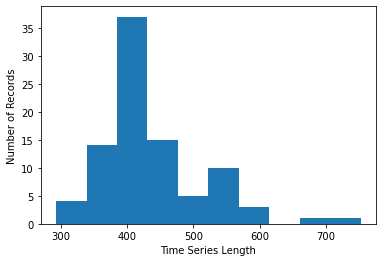

In [200]:
fig, ax = plt.subplots()
ax.hist(fall_f_len)
ax.set(xlabel="Time Series Length", ylabel="Number of Records")

* Non-Falling Data

In [202]:
# data1 Non-Falling data
non_fall_f_len = data_length_analysic("data_split/non-fall/")

Location: data_split/non-fall\101_801_1.txt
File Name: 101_801_1.txt
Shape (616, 24)

Location: data_split/non-fall\101_801_2.txt
File Name: 101_801_2.txt
Shape (649, 24)

Location: data_split/non-fall\101_801_3.txt
File Name: 101_801_3.txt
Shape (648, 24)

Location: data_split/non-fall\101_801_4.txt
File Name: 101_801_4.txt
Shape (611, 24)

Location: data_split/non-fall\101_801_5.txt
File Name: 101_801_5.txt
Shape (616, 24)

Location: data_split/non-fall\101_801_6.txt
File Name: 101_801_6.txt
Shape (590, 24)

Location: data_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data_split/non-fall\102_801_2.txt
File Name: 102_801_2.txt
Shape (541, 24)

Location: data_split/non-fall\102_801_3.txt
File Name: 102_801_3.txt
Shape (503, 24)

Location: data_split/non-fall\102_801_4.txt
File Name: 102_801_4.txt
Shape (523, 24)

Location: data_split/non-fall\102_801_5.txt
File Name: 102_801_5.txt
Shape (556, 24)

Location: data_split/non-fall\103_801_1.txt
File Name:

[Text(0.5, 0, 'Time Series Length'), Text(0, 0.5, 'Number of Records')]

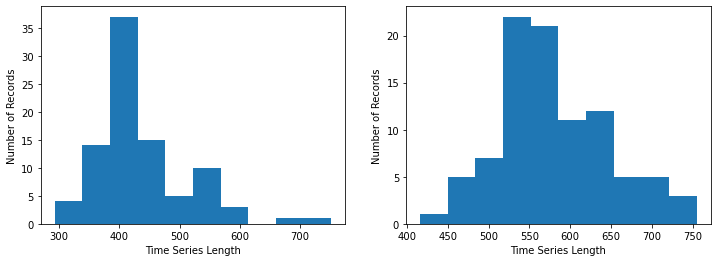

In [209]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ax1.hist(fall_f_len)
ax2.hist(non_fall_f_len)
ax1.set(xlabel="Time Series Length", ylabel="Number of Records")
ax2.set(xlabel="Time Series Length", ylabel="Number of Records")

### Data2

In [348]:
# data2 Falling data
fall_f_len = data_length_analysic("data2_split/fall/")

Location: data2_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data2_split/fall\101_905_1.txt
File Name: 101_905_1.txt
Shape (387, 24)

Location: data2_split/fall\101_909_1.txt
File Name: 101_909_1.txt
Shape (383, 23)

Location: data2_split/fall\101_915_1.txt
File Name: 101_915_1.txt
Shape (470, 23)

Location: data2_split/fall\101_917_1.txt
File Name: 101_917_1.txt
Shape (520, 23)

Location: data2_split/fall\102_901_1.txt
File Name: 102_901_1.txt
Shape (293, 24)

Location: data2_split/fall\102_905_1.txt
File Name: 102_905_1.txt
Shape (386, 24)

Location: data2_split/fall\102_909_1.txt
File Name: 102_909_1.txt
Shape (314, 23)

Location: data2_split/fall\102_915_1.txt
File Name: 102_915_1.txt
Shape (369, 23)

Location: data2_split/fall\102_917_1.txt
File Name: 102_917_1.txt
Shape (436, 23)

Location: data2_split/fall\103_901_1.txt
File Name: 103_901_1.txt
Shape (366, 24)

Location: data2_split/fall\103_905_1.txt
File Name: 103_905_1.txt
Shape (514, 24)

Loca

In [349]:
# data2 Non-Falling data
non_fall_f_len = data_length_analysic("data2_split/non-fall/")

Location: data2_split/non-fall\101_801_1.txt
File Name: 101_801_1.txt
Shape (616, 24)

Location: data2_split/non-fall\101_803_1.txt
File Name: 101_803_1.txt
Shape (516, 24)

Location: data2_split/non-fall\101_806_1.txt
File Name: 101_806_1.txt
Shape (414, 24)

Location: data2_split/non-fall\101_811_1.txt
File Name: 101_811_1.txt
Shape (372, 24)

Location: data2_split/non-fall\101_815_1.txt
File Name: 101_815_1.txt
Shape (469, 24)

Location: data2_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data2_split/non-fall\102_803_1.txt
File Name: 102_803_1.txt
Shape (355, 24)

Location: data2_split/non-fall\102_806_1.txt
File Name: 102_806_1.txt
Shape (232, 24)

Location: data2_split/non-fall\102_811_1.txt
File Name: 102_811_1.txt
Shape (305, 24)

Location: data2_split/non-fall\102_815_1.txt
File Name: 102_815_1.txt
Shape (367, 24)

Location: data2_split/non-fall\103_801_1.txt
File Name: 103_801_1.txt
Shape (416, 24)

Location: data2_split/non-fall\103_803_1.tx

[Text(0.5, 0, 'Time Series Length'), Text(0, 0.5, 'Number of Records')]

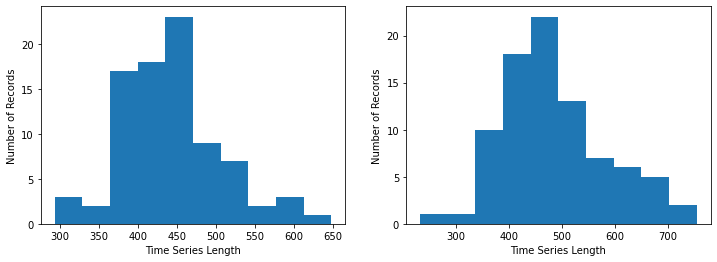

In [350]:
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
ax1.hist(fall_f_len)
ax2.hist(non_fall_f_len)
ax1.set(xlabel="Time Series Length", ylabel="Number of Records")
ax2.set(xlabel="Time Series Length", ylabel="Number of Records")

## 2. Import & Preprocess Data

The ideal Falling VS. Non-Falling data is shonw below （of similar length)
* We want to modify the data to reach the same length so that the variable-length time series problem will become a fixed-length time
series problem

Shape df1 (453, 24)
Shape df2 (458, 24)



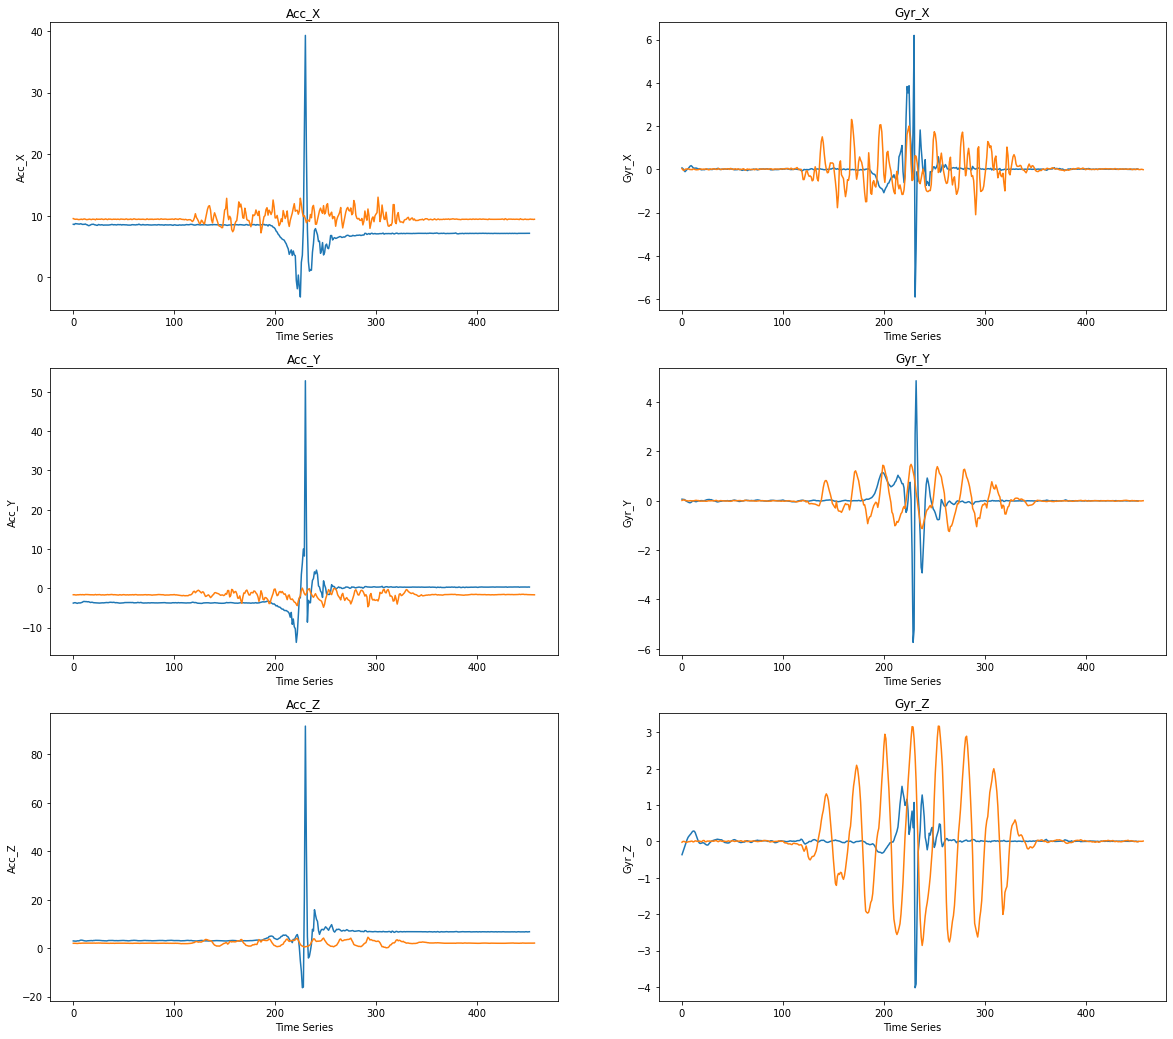

In [250]:
draw_graph("data_split/fall/101_901_2.txt","data_split/non-fall/103_801_2.txt")

### 2.1 Truncate Data

* By observation
    - Data length distribution tells us that most records has the length between 400 to 600 rows
    - Also the key features appear around the mid point of the time peroid
    - So the key features of the majority of records appear around 200 to 300 rows

* Truncate approach
    - To avoid missing key features, we only use record with length in range (400,600) rows
    - Truncate longer record to a unified length of 400 rows

#### 2.1.0 Method Demo

For an array of length around 700, we can see that the major part of its key features are included after being truncated 

(684, 6)


[Text(0.5, 0, 'Time Series'), Text(0.5, 1.0, 'After Truncation')]

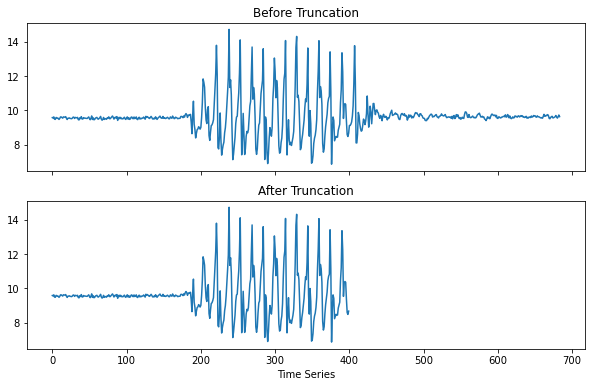

In [217]:
df = pd.read_csv("data_split/non-fall/108_801_1.txt",sep="\t")
n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
print(n_arr.shape)
truncated_arr = n_arr[0:400]

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,6),sharex=True)
ax1.plot(n_arr[:,0])
ax2.plot(truncated_arr[:,0])
ax1.set(title="Before Truncation")
ax2.set(xlabel="Time Series",title="After Truncation")

#### 2.1.1 Import & Preprocess Non-falling Data

In [351]:
# use glob to get all the csv files in the target folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/non-fall/", "*.txt"))

# Feature set for non-fall samples
X_non_fall_arr = np.zeros((400,6))

# loop over the list of csv files
for f in csv_files:
      
    # read the csv file
    df = pd.read_csv(f,sep="\t")
      
    # print the location and filename
    if(len(df)<600 and len(df)>400):
        print('Location:', f)
        print('File Name:', f.split("\\")[-1])
        print('Shape', df.shape)
        # print(df.isna().sum())
        print()
        
        # select the columns we need and convert to numpy arrays
        n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
        # truncate data and take only the first 400 rows
        X_non_fall_arr=np.dstack((X_non_fall_arr, n_arr[0:400]))

# Drop the heading dummpy reocrd (Dummy record is appended earlier for easy creation of the whole 3D array)
X_non_fall_arr = np.delete(X_non_fall_arr,0,2)

# Create Label set for non-fall samples
y_non_fall_arr = np.zeros(X_non_fall_arr.shape[2])

Location: data2_split/non-fall\101_803_1.txt
File Name: 101_803_1.txt
Shape (516, 24)

Location: data2_split/non-fall\101_806_1.txt
File Name: 101_806_1.txt
Shape (414, 24)

Location: data2_split/non-fall\101_815_1.txt
File Name: 101_815_1.txt
Shape (469, 24)

Location: data2_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data2_split/non-fall\103_801_1.txt
File Name: 103_801_1.txt
Shape (416, 24)

Location: data2_split/non-fall\103_803_1.txt
File Name: 103_803_1.txt
Shape (427, 24)

Location: data2_split/non-fall\103_811_1.txt
File Name: 103_811_1.txt
Shape (501, 24)

Location: data2_split/non-fall\103_815_1.txt
File Name: 103_815_1.txt
Shape (544, 24)

Location: data2_split/non-fall\104_806_1.txt
File Name: 104_806_1.txt
Shape (476, 24)

Location: data2_split/non-fall\104_811_1.txt
File Name: 104_811_1.txt
Shape (407, 24)

Location: data2_split/non-fall\104_815_1.txt
File Name: 104_815_1.txt
Shape (463, 24)

Location: data2_split/non-fall\105_803_1.tx

In [352]:
print(X_non_fall_arr.shape)
print(y_non_fall_arr.shape)

(400, 6, 56)
(56,)


#### 2.1.2 Import & Preprocess Falling Data

In [355]:
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/fall/", "*.txt"))
X_fall_arr = np.zeros((400,6))

# loop over the list of csv files
for f in csv_files:
    
    # read the csv file
    df = pd.read_csv(f,sep="\t")
    
    if(len(df)<600 and len(df)>400):
        # print the location and filename
        print('Location:', f)
        print('File Name:', f.split("\\")[-1])
        print('Shape', df.shape)
        # print(df.isna().sum())
        print()
        # select the columns we need and convert to numpy arrays
        n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
        # truncate data and take only the first 400 rows
        X_fall_arr=np.dstack((X_fall_arr, n_arr[0:400]))

# Drop the heading dummpy reocrd (Dummy record is appended earlier for easy creation of the whole 3D array)
X_fall_arr = np.delete(X_fall_arr,0,2)

# Create Label set for non-fall samples
y_fall_arr = np.ones(X_fall_arr.shape[2])

Location: data2_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data2_split/fall\101_915_1.txt
File Name: 101_915_1.txt
Shape (470, 23)

Location: data2_split/fall\101_917_1.txt
File Name: 101_917_1.txt
Shape (520, 23)

Location: data2_split/fall\102_917_1.txt
File Name: 102_917_1.txt
Shape (436, 23)

Location: data2_split/fall\103_905_1.txt
File Name: 103_905_1.txt
Shape (514, 24)

Location: data2_split/fall\103_915_1.txt
File Name: 103_915_1.txt
Shape (435, 23)

Location: data2_split/fall\103_917_1.txt
File Name: 103_917_1.txt
Shape (437, 23)

Location: data2_split/fall\104_901_1.txt
File Name: 104_901_1.txt
Shape (423, 24)

Location: data2_split/fall\104_905_1.txt
File Name: 104_905_1.txt
Shape (440, 24)

Location: data2_split/fall\104_909_1.txt
File Name: 104_909_1.txt
Shape (443, 23)

Location: data2_split/fall\104_915_1.txt
File Name: 104_915_1.txt
Shape (472, 23)

Location: data2_split/fall\104_917_1.txt
File Name: 104_917_1.txt
Shape (559, 23)

Loca

In [356]:
print(X_fall_arr.shape)
print(y_fall_arr.shape)

(400, 6, 61)
(61,)


### 2.2 Fill Missing Data with Numerical Mean
* Approach 1 : Extend with Numerical Mean of the 20% data from the tail of time series or truncate to make the record length = 600 rows
* Approach 2 : Extend on both prefix and sufix with the mean of 10% nearest data to make the record length = 600 rows, and make the
    key features algin around the mid-point of time interval

#### 2.2.0 Method Demo

**Approach 1 : Extend on sufix**

[Text(0.5, 0, 'Time Series'), Text(0.5, 1.0, 'After Extension')]

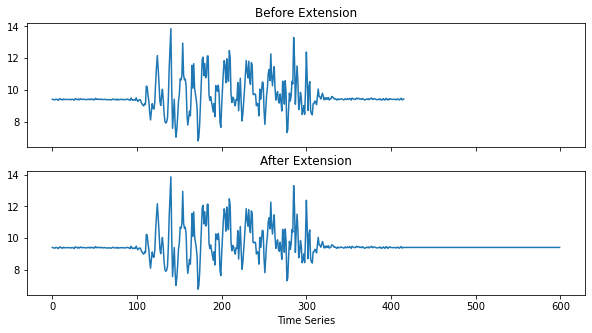

In [372]:
df = pd.read_csv("data_split/non-fall/103_801_1.txt",sep="\t")
n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()

rows_to_fill = 600-df.shape[0]
df_length = len(df)
# Fill empty space with the mean value of the tailing 20% data
start_index = round(df_length*(1-0.2))
end_index = df_length
mean_row = [[df["Acc_X"][start_index:end_index].mean()
             ,df["Acc_Y"][start_index:end_index].mean()
             ,df["Acc_Z"][start_index:end_index].mean()
             ,df["Gyr_X"][start_index:end_index].mean()
             ,df["Gyr_Y"][start_index:end_index].mean()
             ,df["Gyr_Z"][start_index:end_index].mean()]]
extended_rows = np.repeat(mean_row,rows_to_fill,axis=0)
extended_arr = np.concatenate((n_arr,extended_rows))

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,0])
ax2.plot(extended_arr[:,0])
ax1.set(title="Before Extension")
ax2.set(xlabel="Time Series",title="After Extension")

**Approach 2 : Extend on both prefix and sufix**

[Text(0.5, 0, 'Time Series'), Text(0.5, 1.0, 'After Extension')]

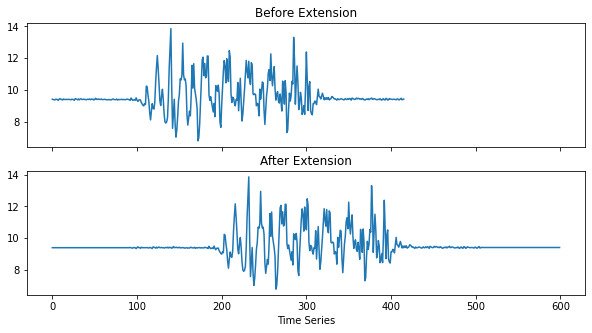

In [267]:
df = pd.read_csv("data_split/non-fall/103_801_1.txt",sep="\t")
n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()

rows_to_fill = 600-df.shape[0]
df_length = len(df)

# Extend with the mean value of the nearest 10% of data at prefix and sufix
prefix_start_index = 0
prefix_end_index = round(df_length*0.1)

sufix_start_index = round(df_length*(1-0.1))
sufix_end_index = df_length

prefix_mean_row = [[df["Acc_X"][prefix_start_index:prefix_end_index].mean()
             ,df["Acc_Y"][prefix_start_index:prefix_end_index].mean()
             ,df["Acc_Z"][prefix_start_index:prefix_end_index].mean()
             ,df["Gyr_X"][prefix_start_index:prefix_end_index].mean()
             ,df["Gyr_Y"][prefix_start_index:prefix_end_index].mean()
             ,df["Gyr_Z"][prefix_start_index:prefix_end_index].mean()]]

sufix_mean_row = [[df["Acc_X"][sufix_start_index:sufix_end_index].mean()
             ,df["Acc_Y"][sufix_start_index:sufix_end_index].mean()
             ,df["Acc_Z"][sufix_start_index:sufix_end_index].mean()
             ,df["Gyr_X"][sufix_start_index:sufix_end_index].mean()
             ,df["Gyr_Y"][sufix_start_index:sufix_end_index].mean()
             ,df["Gyr_Z"][sufix_start_index:sufix_end_index].mean()]]

prefix_extended_rows = np.repeat(prefix_mean_row,round(rows_to_fill/2),axis=0)
sufix_extended_rows = np.repeat(sufix_mean_row,rows_to_fill - round(rows_to_fill/2),axis=0)

extended_arr = np.concatenate((prefix_extended_rows,n_arr))

extended_arr = np.concatenate((extended_arr,sufix_extended_rows))

fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,0])
ax2.plot(extended_arr[:,0])
ax1.set(title="Before Extension")
ax2.set(xlabel="Time Series",title="After Extension")

#### 2.2.1 Approach 1 : Extend on sufix

**Import & Preprocess Non-Falling Data**

In [373]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/non-fall/", "*.txt"))
X_non_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    
    if(df.shape[0] < 600):
        rows_to_fill = 600-df.shape[0]
        df_length = len(df)
        # Fill empty space with the mean value of the tailing 20% data
        start_index = round(df_length*(1-0.2))
        end_index = df_length
        mean_row = [[df["Acc_X"][start_index:end_index].mean()
                     ,df["Acc_Y"][start_index:end_index].mean()
                     ,df["Acc_Z"][start_index:end_index].mean()
                     ,df["Gyr_X"][start_index:end_index].mean()
                     ,df["Gyr_Y"][start_index:end_index].mean()
                     ,df["Gyr_Z"][start_index:end_index].mean()]]
        extended_rows = np.repeat(mean_row,rows_to_fill,axis=0)
        n_arr = np.concatenate((n_arr,extended_rows))

    X_non_fall_arr=np.dstack((X_non_fall_arr, n_arr[0:600]))
        
X_non_fall_arr = np.delete(X_non_fall_arr,0,2)

# Create Label set for non-fall samples
y_non_fall_arr = np.zeros(X_non_fall_arr.shape[2])

Location: data2_split/non-fall\101_801_1.txt
File Name: 101_801_1.txt
Shape (616, 24)

Location: data2_split/non-fall\101_803_1.txt
File Name: 101_803_1.txt
Shape (516, 24)

Location: data2_split/non-fall\101_806_1.txt
File Name: 101_806_1.txt
Shape (414, 24)

Location: data2_split/non-fall\101_811_1.txt
File Name: 101_811_1.txt
Shape (372, 24)

Location: data2_split/non-fall\101_815_1.txt
File Name: 101_815_1.txt
Shape (469, 24)

Location: data2_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data2_split/non-fall\102_803_1.txt
File Name: 102_803_1.txt
Shape (355, 24)

Location: data2_split/non-fall\102_806_1.txt
File Name: 102_806_1.txt
Shape (232, 24)

Location: data2_split/non-fall\102_811_1.txt
File Name: 102_811_1.txt
Shape (305, 24)

Location: data2_split/non-fall\102_815_1.txt
File Name: 102_815_1.txt
Shape (367, 24)

Location: data2_split/non-fall\103_801_1.txt
File Name: 103_801_1.txt
Shape (416, 24)

Location: data2_split/non-fall\103_803_1.tx

In [374]:
print(X_non_fall_arr.shape)
print(y_non_fall_arr.shape)

(600, 6, 85)
(85,)


**Import & Preprocess Falling Data**

In [375]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/fall/", "*.txt"))
X_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    
    if(df.shape[0] < 600):
        rows_to_fill = 600-df.shape[0]
        df_length = len(df)
        # Fill empty space with the mean value of the tailing 20% data
        start_index = round(df_length*(1-0.2))
        end_index = df_length
        mean_row = [[df["Acc_X"][start_index:end_index].mean()
                     ,df["Acc_Y"][start_index:end_index].mean()
                     ,df["Acc_Z"][start_index:end_index].mean()
                     ,df["Gyr_X"][start_index:end_index].mean()
                     ,df["Gyr_Y"][start_index:end_index].mean()
                     ,df["Gyr_Z"][start_index:end_index].mean()]]
        extended_rows = np.repeat(mean_row,rows_to_fill,axis=0)
        n_arr = np.concatenate((n_arr,extended_rows))

    X_fall_arr=np.dstack((X_fall_arr, n_arr[0:600]))
        
X_fall_arr = np.delete(X_fall_arr,0,2)

# Create Label set for non-fall samples
y_fall_arr = np.ones(X_fall_arr.shape[2])

Location: data2_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data2_split/fall\101_905_1.txt
File Name: 101_905_1.txt
Shape (387, 24)

Location: data2_split/fall\101_909_1.txt
File Name: 101_909_1.txt
Shape (383, 23)

Location: data2_split/fall\101_915_1.txt
File Name: 101_915_1.txt
Shape (470, 23)

Location: data2_split/fall\101_917_1.txt
File Name: 101_917_1.txt
Shape (520, 23)

Location: data2_split/fall\102_901_1.txt
File Name: 102_901_1.txt
Shape (293, 24)

Location: data2_split/fall\102_905_1.txt
File Name: 102_905_1.txt
Shape (386, 24)

Location: data2_split/fall\102_909_1.txt
File Name: 102_909_1.txt
Shape (314, 23)

Location: data2_split/fall\102_915_1.txt
File Name: 102_915_1.txt
Shape (369, 23)

Location: data2_split/fall\102_917_1.txt
File Name: 102_917_1.txt
Shape (436, 23)

Location: data2_split/fall\103_901_1.txt
File Name: 103_901_1.txt
Shape (366, 24)

Location: data2_split/fall\103_905_1.txt
File Name: 103_905_1.txt
Shape (514, 24)

Loca

In [376]:
print(X_fall_arr.shape)
print(y_fall_arr.shape)

(600, 6, 85)
(85,)


#### 2.2.2 Approach 2 : Extend on both prefix and sufix 

**Import & Preprocess Non-Falling Data**

In [393]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/non-fall/", "*.txt"))
X_non_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    
    if(df.shape[0] < 600):
        rows_to_fill = 600-df.shape[0]
        df_length = len(df)
        # Extend with the mean value of the nearest 10% of data at prefix and sufix
        prefix_start_index = 0
        prefix_end_index = round(df_length*0.1)

        sufix_start_index = round(df_length*(1-0.1))
        sufix_end_index = df_length

        prefix_mean_row = [[df["Acc_X"][prefix_start_index:prefix_end_index].mean()
                     ,df["Acc_Y"][prefix_start_index:prefix_end_index].mean()
                     ,df["Acc_Z"][prefix_start_index:prefix_end_index].mean()
                     ,df["Gyr_X"][prefix_start_index:prefix_end_index].mean()
                     ,df["Gyr_Y"][prefix_start_index:prefix_end_index].mean()
                     ,df["Gyr_Z"][prefix_start_index:prefix_end_index].mean()]]

        sufix_mean_row = [[df["Acc_X"][sufix_start_index:sufix_end_index].mean()
                     ,df["Acc_Y"][sufix_start_index:sufix_end_index].mean()
                     ,df["Acc_Z"][sufix_start_index:sufix_end_index].mean()
                     ,df["Gyr_X"][sufix_start_index:sufix_end_index].mean()
                     ,df["Gyr_Y"][sufix_start_index:sufix_end_index].mean()
                     ,df["Gyr_Z"][sufix_start_index:sufix_end_index].mean()]]

        prefix_extended_rows = np.repeat(prefix_mean_row,round(rows_to_fill/2),axis=0)
        sufix_extended_rows = np.repeat(sufix_mean_row,rows_to_fill - round(rows_to_fill/2),axis=0)

        extended_arr = np.concatenate((prefix_extended_rows,n_arr))

        extended_arr = np.concatenate((extended_arr,sufix_extended_rows))

    X_non_fall_arr=np.dstack((X_non_fall_arr, extended_arr[0:600]))
        
X_non_fall_arr = np.delete(X_non_fall_arr,0,2)

# Create Label set for non-fall samples
y_non_fall_arr = np.zeros(X_non_fall_arr.shape[2])

Location: data2_split/non-fall\101_801_1.txt
File Name: 101_801_1.txt
Shape (616, 24)

Location: data2_split/non-fall\101_803_1.txt
File Name: 101_803_1.txt
Shape (516, 24)

Location: data2_split/non-fall\101_806_1.txt
File Name: 101_806_1.txt
Shape (414, 24)

Location: data2_split/non-fall\101_811_1.txt
File Name: 101_811_1.txt
Shape (372, 24)

Location: data2_split/non-fall\101_815_1.txt
File Name: 101_815_1.txt
Shape (469, 24)

Location: data2_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data2_split/non-fall\102_803_1.txt
File Name: 102_803_1.txt
Shape (355, 24)

Location: data2_split/non-fall\102_806_1.txt
File Name: 102_806_1.txt
Shape (232, 24)

Location: data2_split/non-fall\102_811_1.txt
File Name: 102_811_1.txt
Shape (305, 24)

Location: data2_split/non-fall\102_815_1.txt
File Name: 102_815_1.txt
Shape (367, 24)

Location: data2_split/non-fall\103_801_1.txt
File Name: 103_801_1.txt
Shape (416, 24)

Location: data2_split/non-fall\103_803_1.tx

In [394]:
print(X_non_fall_arr.shape)
print(y_non_fall_arr.shape)

(600, 6, 85)
(85,)


**Import & Preprocess Falling Data**

In [395]:
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/fall/", "*.txt"))
X_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    
    if(df.shape[0] < 600):
        rows_to_fill = 600-df.shape[0]
        df_length = len(df)
        # Extend with the mean value of the nearest 10% of data at prefix and sufix
        prefix_start_index = 0
        prefix_end_index = round(df_length*0.1)

        sufix_start_index = round(df_length*(1-0.1))
        sufix_end_index = df_length

        prefix_mean_row = [[df["Acc_X"][prefix_start_index:prefix_end_index].mean()
                     ,df["Acc_Y"][prefix_start_index:prefix_end_index].mean()
                     ,df["Acc_Z"][prefix_start_index:prefix_end_index].mean()
                     ,df["Gyr_X"][prefix_start_index:prefix_end_index].mean()
                     ,df["Gyr_Y"][prefix_start_index:prefix_end_index].mean()
                     ,df["Gyr_Z"][prefix_start_index:prefix_end_index].mean()]]

        sufix_mean_row = [[df["Acc_X"][sufix_start_index:sufix_end_index].mean()
                     ,df["Acc_Y"][sufix_start_index:sufix_end_index].mean()
                     ,df["Acc_Z"][sufix_start_index:sufix_end_index].mean()
                     ,df["Gyr_X"][sufix_start_index:sufix_end_index].mean()
                     ,df["Gyr_Y"][sufix_start_index:sufix_end_index].mean()
                     ,df["Gyr_Z"][sufix_start_index:sufix_end_index].mean()]]

        prefix_extended_rows = np.repeat(prefix_mean_row,round(rows_to_fill/2),axis=0)
        sufix_extended_rows = np.repeat(sufix_mean_row,rows_to_fill - round(rows_to_fill/2),axis=0)

        extended_arr = np.concatenate((prefix_extended_rows,n_arr))

        extended_arr = np.concatenate((extended_arr,sufix_extended_rows))

    X_fall_arr=np.dstack((X_fall_arr, extended_arr[0:600]))
        
X_fall_arr = np.delete(X_fall_arr,0,2)

# Create Label set for non-fall samples
y_fall_arr = np.ones(X_fall_arr.shape[2])

Location: data2_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data2_split/fall\101_905_1.txt
File Name: 101_905_1.txt
Shape (387, 24)

Location: data2_split/fall\101_909_1.txt
File Name: 101_909_1.txt
Shape (383, 23)

Location: data2_split/fall\101_915_1.txt
File Name: 101_915_1.txt
Shape (470, 23)

Location: data2_split/fall\101_917_1.txt
File Name: 101_917_1.txt
Shape (520, 23)

Location: data2_split/fall\102_901_1.txt
File Name: 102_901_1.txt
Shape (293, 24)

Location: data2_split/fall\102_905_1.txt
File Name: 102_905_1.txt
Shape (386, 24)

Location: data2_split/fall\102_909_1.txt
File Name: 102_909_1.txt
Shape (314, 23)

Location: data2_split/fall\102_915_1.txt
File Name: 102_915_1.txt
Shape (369, 23)

Location: data2_split/fall\102_917_1.txt
File Name: 102_917_1.txt
Shape (436, 23)

Location: data2_split/fall\103_901_1.txt
File Name: 103_901_1.txt
Shape (366, 24)

Location: data2_split/fall\103_905_1.txt
File Name: 103_905_1.txt
Shape (514, 24)

Loca

In [396]:
print(X_fall_arr.shape)
print(y_fall_arr.shape)

(600, 6, 85)
(85,)


### 2.3 Uniform Scaling (Upsampling)

Reference: 
* Efficiently Finding Arbitrarily Scaled Patterns in Massive Time Series Databases (Eamonn Keogh)
    - https://link.springer.com/chapter/10.1007/978-3-540-39804-2_24
        
* Scale up or scale down records with length not equal to 600 using uniform scaling

Q is a time series with length n 
$$
Q=q_{1},q_{1},...,q_{i},...q_{n}
$$
<br/>
To scale time series Q to produce a new time series QP of length p, the formula is:
$$
QP_{i}=Q_{\left \lceil j * \frac{n}{p} \right \rceil}, 1\leq j\leq p
$$

#### 2.3.0 Method Demo

[Text(0.5, 0, 'Time Series'), Text(0.5, 1.0, 'After Uniform Scaling')]

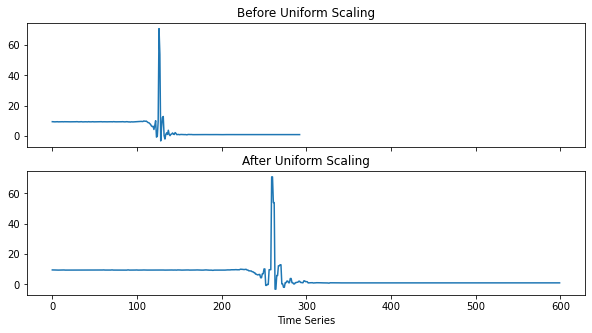

In [219]:
from math import floor
df = pd.read_csv("data_split/fall/102_901_1.txt",sep="\t")
n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
scaled_arr = np.array([[0,0,0,0,0,0]])
arr_len = len(df)
target_length = 600
for i in range(target_length):
    scaled_row = np.array([[
        n_arr[floor(i * arr_len/target_length)][0],
        n_arr[floor(i * arr_len/target_length)][1],
        n_arr[floor(i * arr_len/target_length)][2],
        n_arr[floor(i * arr_len/target_length)][3],
        n_arr[floor(i * arr_len/target_length)][4],
        n_arr[floor(i * arr_len/target_length)][5]
    ]])
    scaled_arr = np.concatenate((scaled_arr,scaled_row))
scaled_arr = np.delete(scaled_arr,0,0)

# Plot figure
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,0])
ax2.plot(scaled_arr[:,0])
ax1.set(title="Before Uniform Scaling")
ax2.set(xlabel="Time Series",title="After Uniform Scaling")

#### 2.3.1 Import & Preprocess Non-Falling Data

In [412]:
from math import floor
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/non-fall/", "*.txt"))
X_non_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    
    scaled_arr = np.array([[0,0,0,0,0,0]])
    arr_len = len(df)
    target_length = 600
    for i in range(target_length):
        scaled_row = np.array([[
            n_arr[floor(i * arr_len/target_length)][0],
            n_arr[floor(i * arr_len/target_length)][1],
            n_arr[floor(i * arr_len/target_length)][2],
            n_arr[floor(i * arr_len/target_length)][3],
            n_arr[floor(i * arr_len/target_length)][4],
            n_arr[floor(i * arr_len/target_length)][5]
        ]])
        scaled_arr = np.concatenate((scaled_arr,scaled_row))
    scaled_arr = np.delete(scaled_arr,0,0)
    X_non_fall_arr=np.dstack((X_non_fall_arr, scaled_arr[0:600]))
        
X_non_fall_arr = np.delete(X_non_fall_arr,0,2)

# Create Label set for non-fall samples
y_non_fall_arr = np.zeros(X_non_fall_arr.shape[2])

Location: data2_split/non-fall\101_801_1.txt
File Name: 101_801_1.txt
Shape (616, 24)

Location: data2_split/non-fall\101_803_1.txt
File Name: 101_803_1.txt
Shape (516, 24)

Location: data2_split/non-fall\101_806_1.txt
File Name: 101_806_1.txt
Shape (414, 24)

Location: data2_split/non-fall\101_811_1.txt
File Name: 101_811_1.txt
Shape (372, 24)

Location: data2_split/non-fall\101_815_1.txt
File Name: 101_815_1.txt
Shape (469, 24)

Location: data2_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data2_split/non-fall\102_803_1.txt
File Name: 102_803_1.txt
Shape (355, 24)

Location: data2_split/non-fall\102_806_1.txt
File Name: 102_806_1.txt
Shape (232, 24)

Location: data2_split/non-fall\102_811_1.txt
File Name: 102_811_1.txt
Shape (305, 24)

Location: data2_split/non-fall\102_815_1.txt
File Name: 102_815_1.txt
Shape (367, 24)

Location: data2_split/non-fall\103_801_1.txt
File Name: 103_801_1.txt
Shape (416, 24)

Location: data2_split/non-fall\103_803_1.tx

In [413]:
print(X_non_fall_arr.shape)
print(y_non_fall_arr.shape)

(600, 6, 85)
(85,)


#### 2.3.2 Import & Preprocess Falling Data

In [414]:
from math import floor
# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/fall/", "*.txt"))
X_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    
    scaled_arr = np.array([[0,0,0,0,0,0]])
    arr_len = len(df)
    target_length = 600
    for i in range(target_length):
        scaled_row = np.array([[
            n_arr[floor(i * arr_len/target_length)][0],
            n_arr[floor(i * arr_len/target_length)][1],
            n_arr[floor(i * arr_len/target_length)][2],
            n_arr[floor(i * arr_len/target_length)][3],
            n_arr[floor(i * arr_len/target_length)][4],
            n_arr[floor(i * arr_len/target_length)][5]
        ]])
        scaled_arr = np.concatenate((scaled_arr,scaled_row))
    scaled_arr = np.delete(scaled_arr,0,0)
    
    X_fall_arr=np.dstack((X_fall_arr, scaled_arr[0:600]))
        
X_fall_arr = np.delete(X_fall_arr,0,2)

# Create Label set for non-fall samples
y_fall_arr = np.ones(X_fall_arr.shape[2])

Location: data2_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data2_split/fall\101_905_1.txt
File Name: 101_905_1.txt
Shape (387, 24)

Location: data2_split/fall\101_909_1.txt
File Name: 101_909_1.txt
Shape (383, 23)

Location: data2_split/fall\101_915_1.txt
File Name: 101_915_1.txt
Shape (470, 23)

Location: data2_split/fall\101_917_1.txt
File Name: 101_917_1.txt
Shape (520, 23)

Location: data2_split/fall\102_901_1.txt
File Name: 102_901_1.txt
Shape (293, 24)

Location: data2_split/fall\102_905_1.txt
File Name: 102_905_1.txt
Shape (386, 24)

Location: data2_split/fall\102_909_1.txt
File Name: 102_909_1.txt
Shape (314, 23)

Location: data2_split/fall\102_915_1.txt
File Name: 102_915_1.txt
Shape (369, 23)

Location: data2_split/fall\102_917_1.txt
File Name: 102_917_1.txt
Shape (436, 23)

Location: data2_split/fall\103_901_1.txt
File Name: 103_901_1.txt
Shape (366, 24)

Location: data2_split/fall\103_905_1.txt
File Name: 103_905_1.txt
Shape (514, 24)

Loca

In [415]:
print(X_fall_arr.shape)
print(y_fall_arr.shape)

(600, 6, 85)
(85,)


### 2.4 Extend at Sufix with Predicted Value

* KNN Imputer 
    - https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer
        
* Remark: When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, 
    the training set average for that feature is used during imputation.
    
    - KNN is not suitable for extending at the end of the time sereis
    - The result is essentially using mean to replace all the missing values
    
* Iterative Imputer
    - https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

#### 2.4.0 Method Demo

KNN Imputer

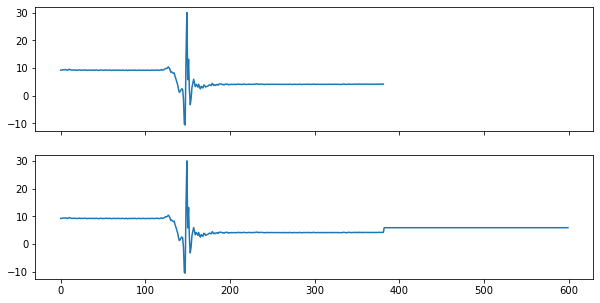

In [88]:
# Approach 1
from sklearn.impute import KNNImputer
df = pd.read_csv("data_split/fall/103_901_2.txt",sep="\t")
n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()

if(df.shape[0] < 600):
    rows_to_fill = 600-df.shape[0]
    extended_arr = n_arr
    imputer = KNNImputer(n_neighbors=20, weights="distance")
    for i in range(rows_to_fill):
        empty_row = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
        extended_arr = np.concatenate((extended_arr,empty_row))
        # Apply KNN Imputer
        extended_arr = imputer.fit_transform(extended_arr)
extended_arr = extended_arr[0:600]

# Plot figure
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,0])
ax2.plot(extended_arr[:,0])

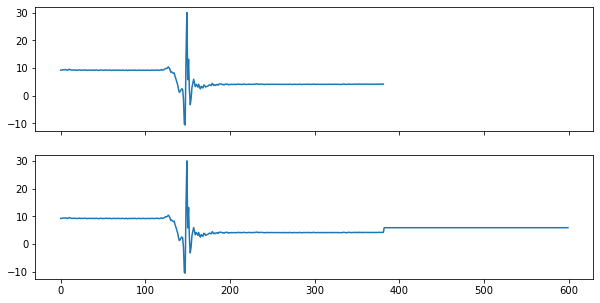

In [89]:
# Approach 2
from sklearn.impute import KNNImputer
df = pd.read_csv("data_split/fall/103_901_2.txt",sep="\t")
n_arr = df[["Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()

if(df.shape[0] < 600):
    rows_to_fill = 600-df.shape[0]
    df_length = len(df)
    # Fill empty space with the mean value of the tailing 20% data
    start_index = round(df_length*(1-0.2))
    end_index = df_length
    empty_row = [[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
    extended_rows = np.repeat(empty_row,rows_to_fill,axis=0)
    extended_arr = np.concatenate((n_arr,extended_rows))
    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=2, weights="distance")
    extended_arr = imputer.fit_transform(extended_arr)
extended_arr = extended_arr[0:600]

# Plot figure
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,0])
ax2.plot(extended_arr[:,0])

Iterative Imputer

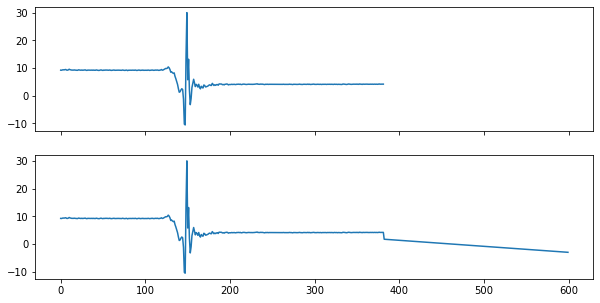

In [115]:
# Approach 1
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.read_csv("data_split/fall/103_901_2.txt",sep="\t")
df['index'] = range(1, len(df) + 1)
n_arr = df[["index","Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
imp = IterativeImputer(max_iter=20, random_state=0)
imp.fit(n_arr)

if(df.shape[0] < 600):
    rows_to_fill = 600-df.shape[0]
    extended_arr = n_arr
    for i in range(rows_to_fill):
        empty_row = [[len(extended_arr)+1 ,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
        extended_arr = np.concatenate((extended_arr,empty_row))
        # Apply Imputer
        extended_arr = imp.transform(extended_arr)
extended_arr = extended_arr[0:600]

# Plot figure
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,1])
ax2.plot(extended_arr[:,1])


[Text(0.5, 0, 'Time Series'), Text(0.5, 1.0, 'After Iterative Imputation')]

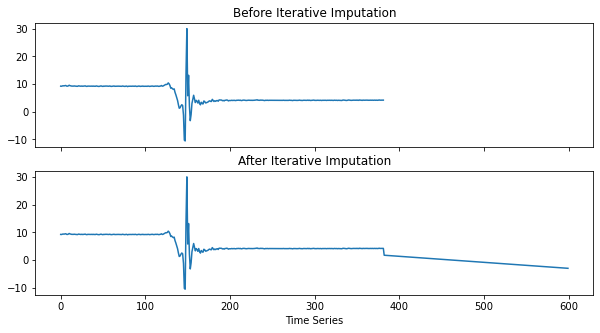

In [220]:
# Approach 2
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df = pd.read_csv("data_split/fall/103_901_2.txt",sep="\t")
df['index'] = range(1, len(df) + 1)
n_arr = df[["index","Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
imp = IterativeImputer(max_iter=20, random_state=0)
imp.fit(n_arr)

if(df.shape[0] < 600):
    rows_to_fill = 600-df.shape[0]
    extended_arr = n_arr
    for i in range(rows_to_fill):
        empty_row = [[len(extended_arr)+1 ,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
        extended_arr = np.concatenate((extended_arr,empty_row))
    extended_arr = imp.transform(extended_arr)
    
extended_arr = extended_arr[0:600]

# Plot figure
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,5),sharex=True)
ax1.plot(n_arr[:,1])
ax2.plot(extended_arr[:,1])
ax1.set(title="Before Iterative Imputation")
ax2.set(xlabel="Time Series",title="After Iterative Imputation")

#### 2.4.1 Iterative Imputer

**Import & Preprocess Non-Falling Data**

In [431]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/non-fall/", "*.txt"))
X_non_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    
    # Add index line for regression
    df['index'] = range(1, len(df) + 1)
    n_arr = df[["index","Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    extended_arr = n_arr
    imp = IterativeImputer(max_iter=20, random_state=0)
    imp.fit(n_arr)
    
    if(df.shape[0] < 600):
        rows_to_fill = 600-df.shape[0]
        for i in range(rows_to_fill):
            empty_row = [[len(extended_arr)+1 ,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
            extended_arr = np.concatenate((extended_arr,empty_row))
            # Apply Imputer
            extended_arr = imp.transform(extended_arr)
    # Delete the index line
    extended_arr = np.delete(extended_arr,0,1)
    # Stack 2d arrays in axis = 2
    X_non_fall_arr=np.dstack((X_non_fall_arr, extended_arr[0:600]))
        
X_non_fall_arr = np.delete(X_non_fall_arr,0,2)

# Create Label set for non-fall samples
y_non_fall_arr = np.zeros(X_non_fall_arr.shape[2])

Location: data2_split/non-fall\101_801_1.txt
File Name: 101_801_1.txt
Shape (616, 24)

Location: data2_split/non-fall\101_803_1.txt
File Name: 101_803_1.txt
Shape (516, 24)

Location: data2_split/non-fall\101_806_1.txt
File Name: 101_806_1.txt
Shape (414, 24)

Location: data2_split/non-fall\101_811_1.txt
File Name: 101_811_1.txt
Shape (372, 24)

Location: data2_split/non-fall\101_815_1.txt
File Name: 101_815_1.txt
Shape (469, 24)

Location: data2_split/non-fall\102_801_1.txt
File Name: 102_801_1.txt
Shape (525, 24)

Location: data2_split/non-fall\102_803_1.txt
File Name: 102_803_1.txt
Shape (355, 24)

Location: data2_split/non-fall\102_806_1.txt
File Name: 102_806_1.txt
Shape (232, 24)

Location: data2_split/non-fall\102_811_1.txt
File Name: 102_811_1.txt
Shape (305, 24)

Location: data2_split/non-fall\102_815_1.txt
File Name: 102_815_1.txt
Shape (367, 24)

Location: data2_split/non-fall\103_801_1.txt
File Name: 103_801_1.txt
Shape (416, 24)

Location: data2_split/non-fall\103_803_1.tx

In [432]:
print(X_non_fall_arr.shape)
print(y_non_fall_arr.shape)

(600, 6, 85)
(85,)


**Import & Preprocess Falling Data**

In [433]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# use glob to get all the csv files in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join("data2_split/fall/", "*.txt"))
X_fall_arr = np.zeros((600,6))

# loop over the list of csv files
for f in csv_files:

    # read the csv file
    df = pd.read_csv(f,sep="\t")

    # print the location and filename
    print('Location:', f)
    print('File Name:', f.split("\\")[-1])
    print('Shape', df.shape)
    print()
    
    # Add index line for regression
    df['index'] = range(1, len(df) + 1)
    n_arr = df[["index","Acc_X","Acc_Y", "Acc_Z","Gyr_X","Gyr_Y","Gyr_Z"]].to_numpy()
    extended_arr = n_arr
    imp = IterativeImputer(max_iter=20, random_state=0)
    imp.fit(n_arr)
    
    if(df.shape[0] < 600):
        rows_to_fill = 600-df.shape[0]
        for i in range(rows_to_fill):
            empty_row = [[len(extended_arr)+1 ,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]]
            extended_arr = np.concatenate((extended_arr,empty_row))
            # Apply Imputer
            extended_arr = imp.transform(extended_arr)
    # Delete the index line
    extended_arr = np.delete(extended_arr,0,1)
    # Stack 2d arrays in axis = 2
    X_fall_arr=np.dstack((X_fall_arr, extended_arr[0:600]))
        
X_fall_arr = np.delete(X_fall_arr,0,2)

# Create Label set for non-fall samples
y_fall_arr = np.ones(X_fall_arr.shape[2])

Location: data2_split/fall\101_901_1.txt
File Name: 101_901_1.txt
Shape (437, 24)

Location: data2_split/fall\101_905_1.txt
File Name: 101_905_1.txt
Shape (387, 24)

Location: data2_split/fall\101_909_1.txt
File Name: 101_909_1.txt
Shape (383, 23)

Location: data2_split/fall\101_915_1.txt
File Name: 101_915_1.txt
Shape (470, 23)

Location: data2_split/fall\101_917_1.txt
File Name: 101_917_1.txt
Shape (520, 23)

Location: data2_split/fall\102_901_1.txt
File Name: 102_901_1.txt
Shape (293, 24)

Location: data2_split/fall\102_905_1.txt
File Name: 102_905_1.txt
Shape (386, 24)

Location: data2_split/fall\102_909_1.txt
File Name: 102_909_1.txt
Shape (314, 23)

Location: data2_split/fall\102_915_1.txt
File Name: 102_915_1.txt
Shape (369, 23)

Location: data2_split/fall\102_917_1.txt
File Name: 102_917_1.txt
Shape (436, 23)

Location: data2_split/fall\103_901_1.txt
File Name: 103_901_1.txt
Shape (366, 24)

Location: data2_split/fall\103_905_1.txt
File Name: 103_905_1.txt
Shape (514, 24)

Loca

In [434]:
print(X_fall_arr.shape)
print(y_fall_arr.shape)

(600, 6, 85)
(85,)


## 3. Data Preparation (Split Data)

### 3.1 OPTION 1 : Split By Hand

#### 3.1.1 Separate Training & Test Data

In [67]:
# The percentage of data we want to use for testing
test_size = 0.2

# Calculate index for separation
non_fall_train_test_sep = round(X_non_fall_arr.shape[2] * (1-test_size))
fall_train_test_sep = round(X_fall_arr.shape[2] * (1-test_size))

# Split data into training and testing set
X_non_fall_train = X_non_fall_arr[:,:,:non_fall_train_test_sep]
y_non_fall_train = y_non_fall_arr[:non_fall_train_test_sep]
X_non_fall_test = X_non_fall_arr[:,:,non_fall_train_test_sep:]
y_non_fall_test = y_non_fall_arr[non_fall_train_test_sep:]

X_fall_train = X_fall_arr[:,:,:fall_train_test_sep]
y_fall_train = y_fall_arr[:fall_train_test_sep]
X_fall_test = X_fall_arr[:,:,fall_train_test_sep:]
y_fall_test = y_fall_arr[fall_train_test_sep:]


print(X_non_fall_train.shape)
print(y_non_fall_train.shape)
print(X_non_fall_test.shape)
print(y_non_fall_test.shape)

print(X_fall_train.shape)
print(y_fall_train.shape)
print(X_fall_test.shape)
print(y_fall_test.shape)

(400, 6, 47)
(47,)
(400, 6, 12)
(12,)
(400, 6, 50)
(50,)
(400, 6, 13)
(13,)


#### 3.1.2 Combine Non-falling & Falling Data

In [135]:
# Concadinate X_non_fall_train & X_fall_train as X_train
X_train = np.dstack((X_non_fall_train,X_fall_train)).T
print(X_train.shape)

# Concatinate y_non_fall_train & y_fall_train as y_train
y_train = np.concatenate([y_fall_train,y_non_fall_train]).T
print(y_train.shape)

# Concatinate X_non_fall_test & X_fall_test as X_test
X_test = np.dstack((X_non_fall_test,X_fall_test)).T
print(X_test.shape)

# Concatinate y_non_fall_test & y_fall_test as y_test
y_test = np.concatenate([y_fall_test,y_non_fall_test]).T
print(y_test.shape)

(97, 6, 400)
(97,)
(25, 6, 400)
(25,)


#### 3.1.3 Shuffle Data

In [231]:
# Shuffle two arrays in unison see https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

### 3.2 OPTION 2 : Split By Train_Test_Split

In [435]:
from sklearn.model_selection import train_test_split

# Combine Non-falling & Falling data
X = np.dstack((X_non_fall_arr,X_fall_arr)).T
y = np.concatenate((y_non_fall_arr,y_fall_arr)).T

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [436]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(136, 6, 600)
(136,)
(34, 6, 600)
(34,)


In [437]:
y_train

array([0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.])

In [438]:
y_test

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.])

## 4. Train & Evaluate Model 

### 4.0 Evaluation Function & Import Package

In [439]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report


# Evaluation function
def evaluate(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision": round(precision,2),
                   "recall": round(recall,2),
                   "f1": round(f1,2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

# Plot ROC curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot lien with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("Flase positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

### 4.1 The RocketClassifier

#### 4.1.1Train

In [440]:
%%time
rocket = RocketClassifier()
rocket.fit(X_train, y_train)

CPU times: total: 24.9 s
Wall time: 24.4 s


RocketClassifier()

#### 4.1.2 Evaluate

In [441]:
%%time
# Evaluation on Accuracy, Precision, Recall, F1 Socre
y_pred = rocket.predict(X_test)
rocket_evaluation_metric = evaluate(y_test,y_pred)

Accuracy: 97.06%
Precision: 0.93
Recall: 1.00
F1 score: 0.97
CPU times: total: 7.41 s
Wall time: 6.1 s


In [442]:
# Classification Report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



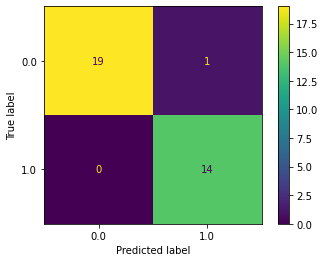

In [443]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred);

ROC_AUC_Score: 0.97


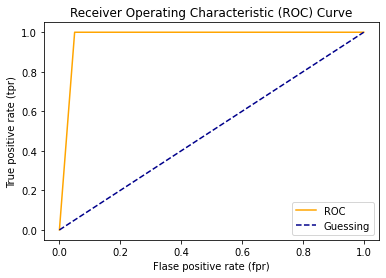

CPU times: total: 6.19 s
Wall time: 6.18 s


In [444]:
%%time
# ROC_AUC
y_probs = rocket.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
roc_score = roc_auc_score(y_test, y_probs_positive)
print(f"ROC_AUC_Score: {roc_score:.2f}")
plot_roc_curve(fpr,tpr)

#### 4.1.3 Cross Validation

In [133]:
%%time
# Combine Non-falling & Falling data
X = np.dstack((X_non_fall_arr,X_fall_arr)).T
y = np.concatenate((y_non_fall_arr,y_fall_arr)).T

cross_val_score(rocket, X, y, cv=5)

array([1., 1., 1., 1., 1.])

### 4.2 HiveCoteV2 (HC2)

#### 4.2.1 Train

In [448]:
%%time
hc2 = HIVECOTEV2(time_limit_in_minutes=1)
hc2.fit(X_train, y_train)

CPU times: total: 1min 52s
Wall time: 1min 25s


HIVECOTEV2(time_limit_in_minutes=1)

#### 4.2.2 Evaluate

In [449]:
%%time
# Evaluation on Accuracy, Precision, Recall, F1 Socre
y_pred = hc2.predict(X_test)
hc2_evaluation_metric = evaluate(y_test,y_pred)

Accuracy: 97.06%
Precision: 0.93
Recall: 1.00
F1 score: 0.97
CPU times: total: 12.7 s
Wall time: 12.7 s


In [450]:
# Classification Report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.93      1.00      0.97        14

    accuracy                           0.97        34
   macro avg       0.97      0.97      0.97        34
weighted avg       0.97      0.97      0.97        34



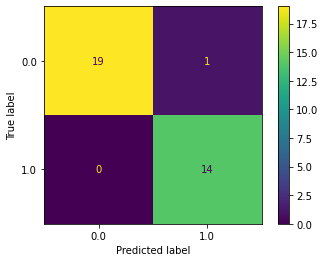

In [451]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_pred);

ROC_AUC_Score: 1.00


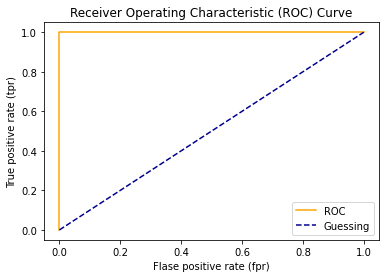

CPU times: total: 12.8 s
Wall time: 12.9 s


In [452]:
%%time
# ROC_AUC
y_probs = hc2.predict_proba(X_test)
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
roc_score = roc_auc_score(y_test, y_probs_positive)
print(f"ROC_AUC_Score: {roc_score:.2f}")
plot_roc_curve(fpr,tpr)

#### 4.2.3 Cross Validation

In [ ]:
%%time
# Combine Non-falling & Falling data
X = np.dstack((X_non_fall_arr,X_fall_arr)).T
y = np.concatenate((y_non_fall_arr,y_fall_arr)).T

cross_val_score(hc2, X, y, cv=5)

### 4.3 Comparison

<AxesSubplot:>

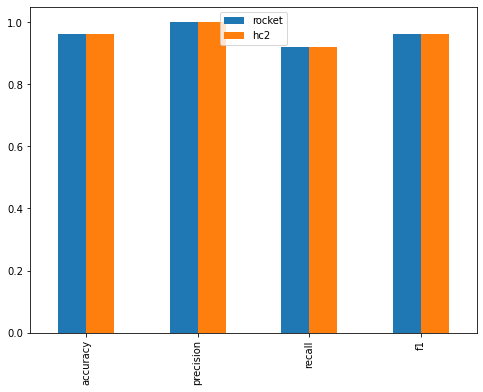

In [119]:
compare_metrics = pd.DataFrame({"rocket": rocket_evaluation_metric,
                                "hc2": hc2_evaluation_metric})
compare_metrics.plot.bar(figsize=(8,6))

## 5. Improve Model (Tunning Hyper Parameter)

### 5.0 Import Packages

In [158]:
from sklearn.model_selection import RandomizedSearchCV

### 5.1 RocketClassifier

#### 5.1.1 Tune Model with RandomizedSearchCV

**Train**

In [161]:
grid = {"num_kernels":[10,100,200,500,1000,1200,10000]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

rs_model = RandomizedSearchCV(estimator=rocket,
                              param_distributions=grid,
                              n_iter=10,
                              cv=5,
                              verbose=2)

rs_model.fit(X_train,y_train)

D:\ML\sample_project_1\env\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END .....................................num_kernels=10; total time=   0.0s
[CV] END .....................................num_kernels=10; total time=   0.0s
[CV] END .....................................num_kernels=10; total time=   0.0s
[CV] END .....................................num_kernels=10; total time=   0.0s
[CV] END .....................................num_kernels=10; total time=   0.0s
[CV] END ....................................num_kernels=100; total time=   0.1s
[CV] END ....................................num_kernels=100; total time=   0.0s
[CV] END ....................................num_kernels=100; total time=   0.1s
[CV] END ....................................num_kernels=100; total time=   0.0s
[CV] END ....................................num_kernels=100; total time=   0.0s
[CV] END ....................................num_kernels=200; total time=   0.2s
[CV] END ....................................num_

RandomizedSearchCV(cv=5, estimator=RocketClassifier(),
                   param_distributions={'num_kernels': [10, 100, 200, 500, 1000,
                                                        1200, 10000]},
                   verbose=2)

**Evaluate**

In [177]:
print(f"Best Parameter: {rs_model.best_params_}")
rs_y_preds = rs_model.predict(X_test)
rs_metrics = evaluate(y_test, rs_y_preds)

Best Parameter: {'num_kernels': 10}
Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


### 5.2 HiveCoteV2 (HC2)

#### 5.2.1 Tune Model with RandomizedSearchCV

**Train**

In [ ]:
grid = {"time_limit_in_minutes":[1,2,3,4,5]}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

rs_model = RandomizedSearchCV(estimator=hc2,
                              param_distributions=grid,
                              n_iter=10,
                              cv=5,
                              verbose=2)

rs_model.fit(X_train,y_train)

**Evaluate**

In [ ]:
print(rs_model.best_params_)
rs_y_preds = rs_model.predict(X_test)
rs_metrics = evaluate(y_test, rs_y_preds)

## 6. Result Visualization

**Data2 RocketClassifier Evaluation Metric**

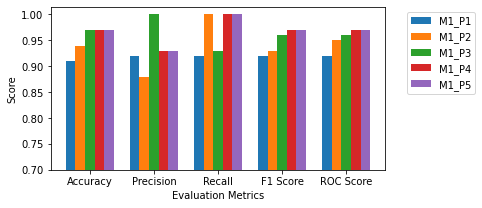

In [47]:
eva_matric = np.array([[0.91,0.94,0.97,0.97,0.97],
            [0.92,0.88,1.00,0.93,0.93],
            [0.92,1.00,0.93,1.00,1.00],
            [0.92,0.93,0.96,0.97,0.97],
            [0.92,0.95,0.96,0.97,0.97]])

bottom_matric = np.array([
    0.7,0.7,0.7,0.7,0.7
])

M1_P1 = eva_matric[:,0]-bottom_matric
M1_P2 = eva_matric[:,1]-bottom_matric
M1_P3 = eva_matric[:,2]-bottom_matric
M1_P4 = eva_matric[:,3]-bottom_matric
M1_P5 = eva_matric[:,4]-bottom_matric

barWidth = 0.3

br1 = np.arange(5) * 2
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]


fig, ax = plt.subplots(figsize=(6,3))


ax.bar(br1, M1_P1,width = barWidth,label='M1_P1',bottom=0.7)
ax.bar(br2, M1_P2,width = barWidth,label='M1_P2',bottom=0.7)
ax.bar(br3, M1_P3,width = barWidth,label='M1_P3',bottom=0.7)
ax.bar(br4, M1_P4,width = barWidth,label='M1_P4',bottom=0.7)
ax.bar(br5, M1_P5,width = barWidth,label='M1_P5',bottom=0.7)

ax.set(xlabel="Evaluation Metrics",ylabel="Score")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_xticks([r + 2*barWidth for r in range(0,10,2)],
        ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC Score'])

**Data2 HiveCoteV2 Evaluation Metric**

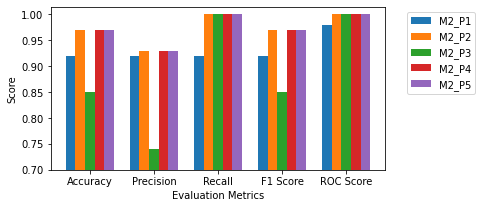

In [49]:
eva_matric = np.array([[0.92,0.97,0.85,0.97,0.97],
            [0.92,0.93,0.74,0.93,0.93],
            [0.92,1.00,1.00,1.00,1.00],
            [0.92,0.97,0.85,0.97,0.97],
            [0.98,1.00,1.00,1.00,1.00]])

bottom_matric = np.array([
    0.7,0.7,0.7,0.7,0.7
])

M2_P1 = eva_matric[:,0]-bottom_matric
M2_P2 = eva_matric[:,1]-bottom_matric
M2_P3 = eva_matric[:,2]-bottom_matric
M2_P4 = eva_matric[:,3]-bottom_matric
M2_P5 = eva_matric[:,4]-bottom_matric

barWidth = 0.3

br1 = np.arange(5) * 2
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]


fig, ax = plt.subplots(figsize=(6,3))


ax.bar(br1, M2_P1,width = barWidth,label='M2_P1',bottom=0.7)
ax.bar(br2, M2_P2,width = barWidth,label='M2_P2',bottom=0.7)
ax.bar(br3, M2_P3,width = barWidth,label='M2_P3',bottom=0.7)
ax.bar(br4, M2_P4,width = barWidth,label='M2_P4',bottom=0.7)
ax.bar(br5, M2_P5,width = barWidth,label='M2_P5',bottom=0.7)

ax.set(xlabel="Evaluation Metrics",ylabel="Score")
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax.set_xticks([r + 2*barWidth for r in range(0,10,2)],
        ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC Score'])

array([0.21, 0.22, 0.22, 0.22, 0.22])